# Step 1: Import all Python libraries

In [14]:
#preprocessing
import re
import pyarabic.araby as araby
import pandas as pd
import numpy as np

# implementation of gensim word2vec
from gensim.test.utils import datapath 
from gensim.corpora import WikiCorpus
import gensim.models
import multiprocessing
from gensim.models import KeyedVectors

#visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import arabic_reshaper
from bidi.algorithm import get_display
import time

# Step 2: Preprocess ArWiki Dump 2018 and save it

**Note**: step2.1 and step2.2 only run once and saved for later loading (because they are computational heavy)

## (Optional) Step2.1: Parse the Corpus

Gensim documentation for WikiCorpus is [here](https://radimrehurek.com/gensim/corpora/wikicorpus.html) and a [kdnuggets](https://www.kdnuggets.com/2017/11/building-wikipedia-text-corpus-nlp.html) tutorial on how to use the object are used to extract the text from wiki dump 2018 and saved in text file locally

**2.1.1: Parse the corpus**

In [8]:
path_to_wiki_dump = datapath("arwiki.xml.bz2")
wiki = WikiCorpus(path_to_wiki_dump)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1332: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


**2.1.2: Save the Parsed data**

In [3]:
output = open("corpus_parsed.txt", 'w',encoding='utf-8')
i = 0
for text in wiki.get_texts():
    output.write(bytes(' '.join(text), 'utf-8').decode('utf-8') + '\n')
    i = i + 1
    if (i % 10000 == 0):
        print('Processed ' + str(i) + ' articles')
output.close()
print('Processing complete!')

Processed 10000 articles
Processed 20000 articles
Processed 30000 articles
Processed 40000 articles
Processed 50000 articles
Processed 60000 articles
Processed 70000 articles
Processed 80000 articles
Processed 90000 articles
Processed 100000 articles
Processed 110000 articles
Processed 120000 articles
Processed 130000 articles
Processed 140000 articles
Processed 150000 articles
Processed 160000 articles
Processed 170000 articles
Processed 180000 articles
Processed 190000 articles
Processed 200000 articles
Processed 210000 articles
Processed 220000 articles
Processed 230000 articles
Processed 240000 articles
Processed 250000 articles
Processed 260000 articles
Processed 270000 articles
Processed 280000 articles
Processed 290000 articles
Processed 300000 articles
Processed 310000 articles
Processed 320000 articles
Processed 330000 articles
Processed 340000 articles
Processed 350000 articles
Processed 360000 articles
Processed 370000 articles
Processed 380000 articles
Processing complete!


## (Optional) Step2.2: Clean the Corpus

**Step 2.2.1. Remove the following using <u>Regular Expression (RegEx)</u>:**
- English letters (lower and upper case)
- digits \[0, 9\]
- Extra spaces in the text
- non-arabic letters
- Tashkeel and tatweel

In [5]:
with open("corpus_parsed.txt", 'r',encoding='utf-8') as f:
    data = f.read()
len(data)

711080750

In [12]:
#remove all english words
pattern = '[a-zA-Z0-9]+'
c=re.compile(pattern)
parsed_data=c.sub("",data)

#remove non-arabic characters
c = re.compile(r'[^\n \u0622\u0623\u0624\u0625\u0626\u0627\u0628\u0629\u062a\u062b\u062c\u062d\u062e\u062f\u0630\u0631\u0632\u0633\u0634\u0635\u0636\u0637\u0638\u0639\u063a\u0640\u0641\u0642\u0643\u0644\u0645\u0646\u0647\u0648\u0649\u064a\u0653\u0654\u0655\ufefb\ufef7\ufef9\ufef5]')
parsed_data=c.sub("",parsed_data)

#remove extra spaces
parsed_data = re.sub(' +', ' ', parsed_data)

# removing tashkeel
parsed_data = araby.strip_tashkeel(parsed_data)
# removing longation
parsed_data = araby.strip_tatweel(parsed_data)



In [13]:
parsed_data[20000:40000]

' منتجات للكربون بالإضافة إلى الما تلا ذلك وجود البكتريا الزرقا وجميع أنواع حقيقي ات النوى ذاتي التغذية التي استخدمت الما وثنائي أكسيد الكربون في تفاعل إنتاج الطاقة بوجود الضو للحصول على الأكسجين والسك من خلال هذه العملي ارتفع منسوب غاز الأكسجين في الما وفي الغلاف الجو وبذلك أصبح من الممكن الحصول على الطاقة عن طريق التنف الخلوي على هذا الأساس أصبح الما هو الوسط الرئيسي في جميع الكائنات الحي من أجل تمام عمليات الاستقلاب الكيميائي الحيوي للحصول على الطاقة وتخزينها ويتمث ذلك في العملي ات الحيوي التالية التركيب الضوئي وتحل السك وتحل الدهن ودورة حمض الستريك ودورة اليوريا يعود الفضل في ذلك إلى كون الما من المذيبات القطبي مم يسهم في إذابة الإلكتروليتات والمرك ات القطبي ومن جهة أخرى تسهم لزوجة وكثافة الما الملائمة في كونه وسطا ناقلا للمرك بات اللاقطبي غير القابلة للذوبان في الما مثل المغذ ات والدهون ونتائج التقويض والهدم الاستقلابي والهرمونات بالتالي فالما هو أساس الأوساط الناقلة مثل الدم والبلازما واللمف عند الثدي يات والنسيج الوعائي الخشبي عند النباتات يقوم الما بالإضافة إلى ذلك في ضبط حرارة

**Step2.2.2. Save it in *output_cleaned.txt* file**


In [14]:
with open("corpus_cleaned.txt", 'w',encoding='utf-8') as f:
    f.write(parsed_data)
len(parsed_data)

676126503

## Step2.3: Reformat the corpus for Training

In [15]:
# read the data stored in parsed_data
with open("corpus_cleaned.txt", 'r',encoding='utf-8') as f:
    corpus=f.read()
len(corpus)

676126503

Note: gensim.models.Word2Vec accepts corpus in the following format: <br>
corpus= \[ \[article1\], \["word1","word2","word3",..., ect\],... ,ect \] <br>
*Definition*: list of lists, where nested list holds all words that composes an article, as list of strings*


In [16]:
# articles are seperated by \n 
corpus=corpus.split("\n")
#break the words of each article to list of words
for sentence_ind in range(len(corpus)):
    word_list=corpus[sentence_ind].split(" ")
    corpus[sentence_ind]=word_list
len(corpus)

381000

# Step3: Create Word2Vec Word Embedding

List of usefull references used for Step3:
- [machinelearningmastry](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/): (is using GenSim3 syntax)
- Word2Vec official documentation [page 1](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html),[page 2](https://radimrehurek.com/gensim/models/word2vec.html)
- [Updated Gensim Syntax](https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4) is used as GenSim version 4 is used in the experiments 

## Step 3.1 : Parameter Tuning of SkipGram

*gensim.models.Word2Vec(sentences,vector_size,window,sg,workers)*<hr>
- List of used Training parameters:
    - **sentences** : corpus of the dataset
    - **vector_size** (int, optional) – Dimensionality of the word vectors.
    - **window** :(int, optional) – Maximum distance between the current and predicted word within a sentence
    - **sg** ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW
    - **workers** (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines). 
- List of parameters needs tuning : 1)vector_size, 2)window

In [17]:
#list of parameters for tuning
vector_size_list=[500]
window_list=[10,15,20]
model_name_list=[]
model_time_list=[]

In [18]:
#define the number of workers for the training phase
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
workers=cores-1
workers

15

**Step3.1.1: train all models**

In [19]:
#train all possible models and save the model
c=1
for vector_size in vector_size_list:
    for window in window_list:
        
        #build the skipgram
        print("model {} is training \n".format(c))
        c=c+1
        start_time=time.time()
        model = gensim.models.Word2Vec(sentences=corpus,vector_size=vector_size,window=window,sg=1,workers=workers)
        end_time=time.time()
        elapsed_time = end_time-start_time
        
        # Store just the words + their trained embeddings.
        model_time_list.append(elapsed_time)
        model_name = str(vector_size)+str(window)+"word2vec.wordvectors" #model name = vector_size-window-model
        model_name_list.append(model_name)
        word_vectors = model.wv
        word_vectors.save(model_name)#save embedded matrix of type "KeyedVectors"

model 1 is training 

model 2 is training 

model 3 is training 

model 4 is training 

model 5 is training 



MemoryError: Unable to allocate 1.60 GiB for an array with shape (430732, 1000) and data type float32

- Notes on saving the trained model: <br>
the trained vectors are stored as keyedVectors as declared in the [documentation](https://radimrehurek.com/gensim/models/word2vec.html)
So we extract the word vectors of the Word2Vec model and save it as keyedVectors with the extension .wordvectors <br>
The reason for separating the trained vectors into KeyedVectors is that if you don’t need the full model state any more (don’t need to continue training), its state can discarded, keeping just the vectors and their keys proper.<br>

**Step3.1.2: Print all models Performance metric**

In [ ]:
#print the training time for each model parameters values
for indx in range(len(model_name)):
    print("the model {} takes {}\n", model_name[indx],model_time_list[indx])

**Step3.1.2: Load best performing trained model**

In [188]:
# Load back with memory-mapping = read-only, shared across processes.
#indx = int(input("Enter the indx of best model"))
#best_model_name=model_name[indx]
wv = KeyedVectors.load("50020word2vec.wordvectors", mmap='r') #wv: stands for word vector
#extract the embedding matrix
model = wv.get_normed_vectors()
print(wv)

(Optional) retrieve words embedding vector

In [58]:
#uncomment to observe the embedding vector of a word
word=input("Enter a word in the dictionary")
vec_unknown = wv[word]
print("type of embedding vector is:{}".format(type(vec_unknown)))
vec_unknown.tolist()#convert from KeyedVector to list 


Enter a word in the dictionary
type of embedding vector is:<class 'numpy.memmap'>


[-0.0825285017490387,
 0.024910110980272293,
 -0.22056271135807037,
 0.37269604206085205,
 -0.24041995406150818,
 -0.22593024373054504,
 0.1910875290632248,
 0.39806538820266724,
 -0.09227494895458221,
 0.10845563560724258,
 -0.31508928537368774,
 0.28973087668418884,
 -0.316593199968338,
 0.25045788288116455,
 -0.05030034855008125,
 0.20353248715400696,
 0.18839141726493835,
 -0.41664350032806396,
 -0.05535102263092995,
 0.0009357620729133487,
 0.15647269785404205,
 -0.03391767293214798,
 -0.08703354746103287,
 -0.015313715673983097,
 0.04465893283486366,
 0.24752092361450195,
 0.28591808676719666,
 -0.16315637528896332,
 -0.34771695733070374,
 0.4146274924278259,
 0.2841031849384308,
 -0.29354527592658997,
 -0.0019033577991649508,
 -0.12095649540424347,
 -0.02026909403502941,
 0.06690023094415665,
 0.016139274463057518,
 0.2610059976577759,
 -0.031124303117394447,
 0.3550885021686554,
 0.1699923276901245,
 0.29183509945869446,
 -0.05065932124853134,
 -0.005424759350717068,
 -0.024954

# Step 5: Evaluate the Performance
List of resources used in this step:
- [GenSim documentation](https://radimrehurek.com/gensim/models/word2vec.html)
- [Kaggle gensim-word2vec-tutorial](https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook)

In [59]:
#words library
wv.key_to_index 

{'في': 0,
 'من': 1,
 'تصنيف': 2,
 'على': 3,
 'إلى': 4,
 'أن': 5,
 'عام': 6,
 'عن': 7,
 'التي': 8,
 'أو': 9,
 'مع': 10,
 'هو': 11,
 'بن': 12,
 'كان': 13,
 'بعد': 14,
 'لاعبو': 15,
 'ما': 16,
 'الذي': 17,
 'هذه': 18,
 'سنة': 19,
 'بين': 20,
 'هذا': 21,
 'هي': 22,
 'حيث': 23,
 'مواليد': 24,
 'كرة': 25,
 'مراجع': 26,
 'ذلك': 27,
 'لا': 28,
 'كما': 29,
 'وقد': 30,
 'عبد': 31,
 'كانت': 32,
 'المتحدة': 33,
 'تم': 34,
 'قبل': 35,
 'أيضا': 36,
 'وفي': 37,
 'محمد': 38,
 'عدد': 39,
 'وهو': 40,
 'خلال': 41,
 'ثم': 42,
 'قدم': 43,
 'كل': 44,
 'الله': 45,
 'القرن': 46,
 'قد': 47,
 'حتى': 48,
 'مدينة': 49,
 'مثل': 50,
 'غير': 51,
 'لم': 52,
 'له': 53,
 'أفلام': 54,
 'خارجية': 55,
 'أشخاص': 56,
 'وهي': 57,
 'بعض': 58,
 'العالم': 59,
 'ه': 60,
 'الولايات': 61,
 'لكرة': 62,
 'وكان': 63,
 'علي': 64,
 'العربية': 65,
 'أكثر': 66,
 'فيها': 67,
 'الأولى': 68,
 'نادي': 69,
 'القدم': 70,
 'ومن': 71,
 'أي': 72,
 'الحياة': 73,
 'الأول': 74,
 'أنه': 75,
 'جامعة': 76,
 'يمكن': 77,
 'أول': 78,
 'حسب': 79,
 'بها': 8

## Test1: Most Similar Words
Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively. [link](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html#gensim.models.Word2Vec.most_similar)<br>
- Pick 8 Arabic words and, for each one, ask each model about
the **most similar 10 words to it. Plot the results using t-SNE** (or scatterplot) and discuss
them
<hr>
<strong>Syntax</strong>[doc](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html#gensim.models.Word2Vec.most_similar)
<br>
Word2Vec.most_similar(positive=[], negative=[], topn=10, restrict_vocab=None, indexer=None)

**Phase 1: Functions for data visualization**

In [101]:
#this function removes the persentage from the tuple and just keeps the similar words in a list
def extract_word_only(similar_words_vector):
    list_similar_words=[]
    for word,prob in similar_words_vector:
        list_similar_words.append(word)
    return list_similar_words

In [102]:
# create a function that creates a dataframe for each word embedding and 2 last column 
#0 (if original word), 1 (if similar words)
# the last column is the text word as string
def drawTSNE(model,EmbSize, w_original, w_similar):
    # Step1: create embedding dataframe
    ## create a nested list 
    data_list = []
    word_text=[]
    legend_text=[]
    ##push word embedding for w_original 
    word_text.append(w_original)
    legend_text.append("Original")
    org_wordEmb = wv[w_original].tolist()
    org_row=org_wordEmb
    data_list.append(org_row)
    ##push word embedding for w_similar
    for word in w_similar:
        word_text.append(word)
        legend_text.append("Similar")
        similar_wordEmb=wv[word].tolist()
        similar_row=similar_wordEmb
        data_list.append(similar_row)
    #print(len(data_list)) = 11 words(1 org and 10 similar words)
    

    ##convert the nested list
    
    ### create the column vector
    columns=[0]*(EmbSize)#300 elements
    for i in range(EmbSize):#indx=0-229 , aka fill-in 300
        columns[i]="Emb"+str(i+1)
    np_columns=np.array(columns,dtype=str)
    
    
    ### convert the nested list to numpy array then to pandas dataframe
    #(note) the expected size (rows(i.e. words) = 11, columns(i.e. embedding_mat+label) = 301)
    data_nparray= np.array(data_list,dtype=float)
    
    df = pd.DataFrame(data_nparray, columns=columns)
    df_labeled=df
    df_labeled['Word']=legend_text
    ## fix the way arabic printed backwards letters using arabic_reshaper
    word_reshaped = [get_display(arabic_reshaper.reshape(word)) for word in word_text]

    
    
    
    #Step2: 
    tsne = TSNE(n_components=2, perplexity=40, n_iter=300,init='random',learning_rate='auto')
    tsne_results = tsne.fit_transform(df.iloc[:,:-1])
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    fig, ax = plt.subplots()
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="Word",
        data=df_labeled
    )
    plt.grid()
    plt.title('T-SNE of the Keyword and its similar words')
    # Set x-axis label
    plt.xlabel('T-SNE X-axis ')
    # Set y-axis label
    plt.ylabel('T-SNE Y-axis')
    for i, txt in enumerate(word_reshaped):
        ax.annotate(txt, (df['tsne-2d-one'].iloc[i], df['tsne-2d-two'].iloc[i]))



In [153]:
# create a function that creates a dataframe for each word embedding and 2 last column 
#0 (if original word), 1 (if similar words)
# the last column is the text word as string
def drawTSNE_pair(model,EmbSize, w_original, w_similar):
    # Step1: create embedding dataframe
    ## create a nested list 
    data_list = []
    word_text=[]
    legend_text=[]
    ##push word embedding for w_original 
    for word in w_original:
        word_text.append(word)
        legend_text.append("Group1")
        org_wordEmb = wv[word].tolist()
        org_row=org_wordEmb
        data_list.append(org_row)
    ##push word embedding for w_similar
    for word in w_similar:
        word_text.append(word)
        legend_text.append("Group2")
        similar_wordEmb=wv[word].tolist()
        similar_row=similar_wordEmb
        data_list.append(similar_row)
    print(len(data_list)) #= 11 words(1 org and 10 similar words)
    

    ##convert the nested list
    
    ### create the column vector
    columns=[0]*(EmbSize)#300 elements
    for i in range(EmbSize):#indx=0-229 , aka fill-in 300
        columns[i]="Emb"+str(i+1)
    np_columns=np.array(columns,dtype=str)
    
    
    ### convert the nested list to numpy array then to pandas dataframe
    #(note) the expected size (rows(i.e. words) = 11, columns(i.e. embedding_mat+label) = 301)
    data_nparray= np.array(data_list,dtype=float)
    
    df = pd.DataFrame(data_nparray, columns=columns)
    df_labeled=df
    df_labeled['Word']=legend_text
    ## fix the way arabic printed backwards letters using arabic_reshaper
    word_reshaped = [get_display(arabic_reshaper.reshape(word)) for word in word_text]

    
    
    
    #Step2: 
    tsne = TSNE(n_components=2, perplexity=40, n_iter=300,init='random',learning_rate='auto')
    tsne_results = tsne.fit_transform(df.iloc[:,:-1])
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    fig, ax = plt.subplots()
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="Word",
        data=df_labeled
    )
    plt.grid()
    plt.title('T-SNE of the Keyword and its similar words')
    # Set x-axis label
    plt.xlabel('T-SNE X-axis ')
    # Set y-axis label
    plt.ylabel('T-SNE Y-axis')
    for i, txt in enumerate(word_reshaped):
        ax.annotate(txt, (df['tsne-2d-one'].iloc[i], df['tsne-2d-two'].iloc[i]))



**Phase 2: Test the following 8 arabic words**
1. مراجع
2. الإسلامية
3. ابن
4. يوم
5. عقد
6. كبيرة
7. وجود

[('خارجية', 0.7487398982048035),
 ('وصلات', 0.748647928237915),
 ('تصنيف', 0.742483913898468),
 ('المراجع', 0.658847987651825),
 ('أشخاص', 0.6386511325836182),
 ('قيد', 0.6068044900894165),
 ('الحياة', 0.5491456985473633),
 ('روابط', 0.5423204302787781),
 ('مصادر', 0.5337178111076355),
 ('انظر', 0.5263305902481079)]

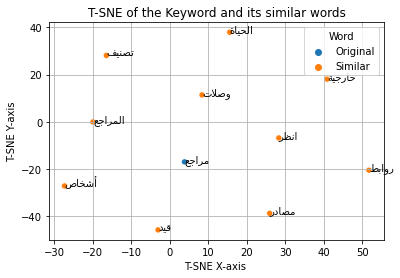

In [103]:
#word1 : مراجع
similar_words_vector=wv.most_similar(positive=["مراجع"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "مراجع",similar_words )
similar_words_vector

[('الاسلامية', 0.67836993932724),
 ('الإسلامي', 0.6765275597572327),
 ('الشريعة', 0.5850021243095398),
 ('الدولة', 0.5784173607826233),
 ('الإسلام', 0.5754393339157104),
 ('إسلامية', 0.5594869256019592),
 ('تنظيم', 0.5369313359260559),
 ('داعش', 0.5171026587486267),
 ('إسلامي', 0.5137135982513428),
 ('المسلمين', 0.5134093165397644)]

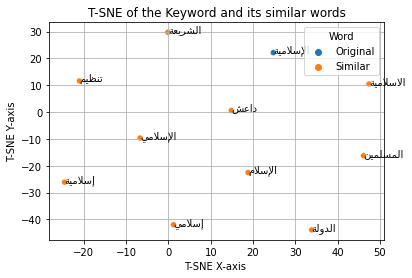

In [104]:
#word2 :الإسلامية
similar_words_vector=wv.most_similar(positive=["الإسلامية"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "الإسلامية",similar_words )
similar_words_vector

[('وابن', 0.6988572478294373),
 ('لابن', 0.6409479975700378),
 ('أبي', 0.6371892690658569),
 ('البغوى', 0.5945927500724792),
 ('والهيثمي', 0.5941063761711121),
 ('الآبنوسي', 0.5909234881401062),
 ('والبلقيني', 0.5873032808303833),
 ('الصائن', 0.5771080255508423),
 ('القتيبي', 0.5750625729560852),
 ('للرضي', 0.5726627111434937)]

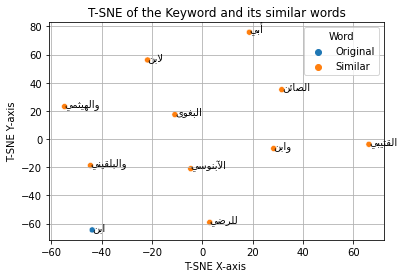

In [105]:
#word3 : ابن

similar_words_vector=wv.most_similar(positive=["ابن"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "ابن",similar_words )
similar_words_vector

[('شهر', 0.6254439949989319),
 ('أكتوبر', 0.6080725789070129),
 ('ديسمبر', 0.5974884629249573),
 ('يناير', 0.597321629524231),
 ('يوليو', 0.5958625674247742),
 ('مايو', 0.5949491858482361),
 ('مارس', 0.5922935605049133),
 ('اليوم', 0.5905032157897949),
 ('سبتمبر', 0.5887196063995361),
 ('أيام', 0.5875408053398132)]

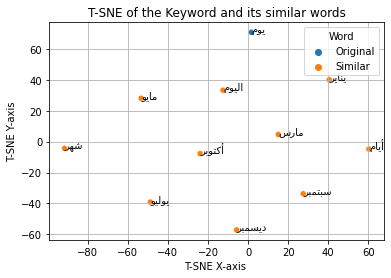

In [106]:
#word4 : يوم
similar_words_vector=wv.most_similar(positive=["يوم"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "يوم",similar_words )
similar_words_vector

[('دبي', 0.7332517504692078),
 ('أبوظبي', 0.7147772908210754),
 ('الشارقة', 0.6871019005775452),
 ('عجمان', 0.6383348703384399),
 ('الإماراتي', 0.6374403834342957),
 ('الإماراتية', 0.6370972394943237),
 ('الامارات', 0.6321973204612732),
 ('بالإمارات', 0.6321775317192078),
 ('الفجيرة', 0.6245067715644836),
 ('ظبي', 0.6222904324531555)]

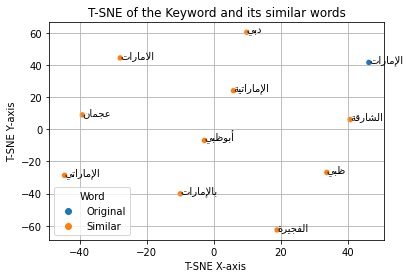

In [199]:
#word5 : عقد
similar_words_vector=wv.most_similar(positive=["الإمارات"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "الإمارات",similar_words )
similar_words_vector

[('صغيرة', 0.6617406606674194),
 ('جدا', 0.624532163143158),
 ('كبير', 0.6116679310798645),
 ('واسعة', 0.6097458600997925),
 ('أكبر', 0.5932729244232178),
 ('عالية', 0.5917139649391174),
 ('ضخمة', 0.5875808000564575),
 ('خاصة', 0.5621703267097473),
 ('الكبيرة', 0.560832679271698),
 ('معظم', 0.5602902173995972)]

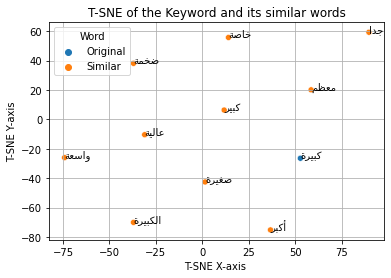

In [108]:
#word6 :كبيرة
similar_words_vector=wv.most_similar(positive=["كبيرة"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "كبيرة",similar_words )
similar_words_vector

[('عدم', 0.66497802734375),
 ('لوجود', 0.5737119317054749),
 ('يوجد', 0.5638486742973328),
 ('ووجود', 0.5547263026237488),
 ('بوجود', 0.5480150580406189),
 ('توجد', 0.5444865226745605),
 ('حدوث', 0.5418217182159424),
 ('هناك', 0.5291207432746887),
 ('وجودها', 0.514934778213501),
 ('للتجاذب', 0.5120223760604858)]

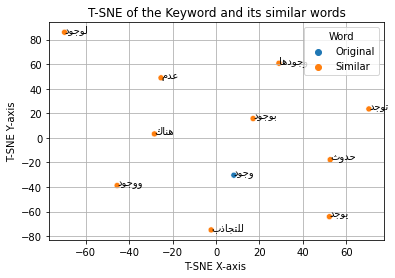

In [138]:
#word7 :وجود
similar_words_vector=wv.most_similar(positive=["وجود"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,500, "وجود",similar_words )
similar_words_vector

## Test2: Odd-One-Out
- we ask our model to give us the word that does not belong to the list [doc](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.doesnt_match.html#gensim.models.Word2Vec.doesnt_match)
<br>
- TASK: pick **5-10 triplets** of Arabic words and, for each one, ask each model to
pick the word in the triplet that does not belong to it. Discuss the results.

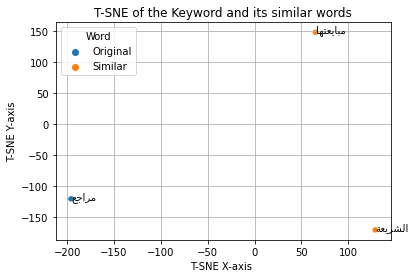

In [126]:
#triplet 1
diff=wv.doesnt_match(['الشريعة','مبايعتها','مراجع'])

similar_words=['الشريعة','مبايعتها']

drawTSNE(wv,500, diff,similar_words)

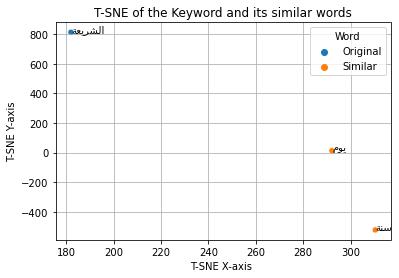

In [129]:
#triplet 2
diff=wv.doesnt_match(['الشريعة','سنة','يوم'])

similar_words=['سنة','يوم']

drawTSNE(wv,500, diff,similar_words)

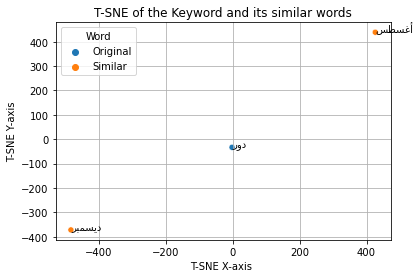

In [112]:
#triplet 3
diff=wv.doesnt_match(['أغسطس','ديسمبر','دور'])

similar_words=['أغسطس','ديسمبر']

drawTSNE(wv,500, diff,similar_words)

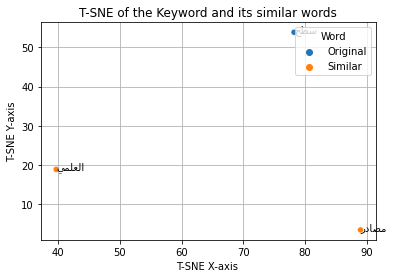

In [113]:
#triplet 4
diff=wv.doesnt_match(['العلمي','مصادر','سطح'])

similar_words=['العلمي','مصادر']

drawTSNE(wv,500, diff,similar_words)

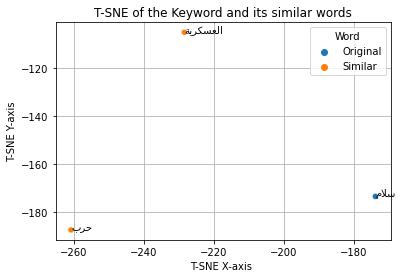

In [131]:
#triplet 5
diff=wv.doesnt_match(['حرب','سلام','العسكرية'])

similar_words=['حرب','العسكرية']

drawTSNE(wv,500, diff,similar_words)

## Test3: Measuring Sentence Similarity
Find the Sentences similar to each other by computing the **cosine similarity** function of the two embedding vectors as in [Paul Minogue blog](https://paulminogue.com/index.php/2019/09/29/introduction-to-cosine-similarity/)<br>
Note : **pyemd is a dependency of wmdistance**


<br>write **5 sentences in Arabic**. For each sentence, **pick 2-3
words and replace them with their synonyms or antonyms**. Use your embeddings to
compute the similarity between each sentence and its modified version. Discuss the
results

In [132]:
sentence1="اقرب منزل باتجاه الشمال الغربي"
sentence2="اقرب منزل باتجاه الشمال الشرقي"

wv.wmdistance(sentence1,sentence2)

0.08784823054748425

In [116]:
sentence1="ابعد منزل باتجاه الجنوب الشرقي"
sentence2="اقرب منزل باتجاه الشمال الشرقي"

wv.wmdistance(sentence1,sentence2)

0.2367178097462311

In [117]:
sentence1="الامارات العربية المتحدة تقع في العالم العربي"
sentence2=" الولايات المتحدة تقع في العالم الغربي"

wv.wmdistance(sentence1,sentence2)

0.16253380330393738

In [118]:
sentence1="تتكون السنة من شهور"
sentence2="تتكون الشهر من اسابيع"

wv.wmdistance(sentence1,sentence2)

0.28917405403482505

In [119]:
sentence2="اقرب مدرسة باتجاه الشمال الشرقي"
sentence1="اقرب منزل باتجاه الشمال الشرقي"

wv.wmdistance(sentence1,sentence2)

0.15008193598030528

## Test4: Analogy
- Syntax in [link](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.doesnt_match.html#gensim.models.Word2Vec.doesnt_match)
- pick 5-10 cases of analogies in Arabic, like the one we used in class:

6


[('أربعة', 0.8120179176330566),
 ('خمسة', 0.7660980224609375),
 ('ستة', 0.7478825449943542),
 ('ثلاث', 0.700265109539032),
 ('سبعة', 0.6996170282363892),
 ('ثمانية', 0.6553516387939453),
 ('تسعة', 0.6185495257377625),
 ('أربع', 0.6114603877067566),
 ('واحد', 0.5933309197425842),
 ('اثنين', 0.5726674199104309)]

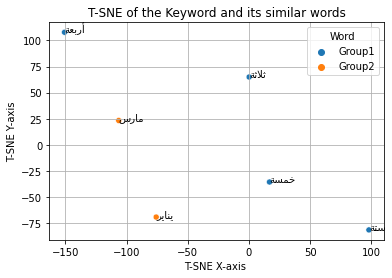

In [189]:
#Anallogy1
Anallogy1=wv.most_similar(positive=["يناير", "ثلاثة"], negative=["مارس"], topn=10)
drawTSNE_pair(wv,500, ["ثلاثة","أربعة","خمسة","ستة"], ["مارس","يناير"])
Anallogy1

6


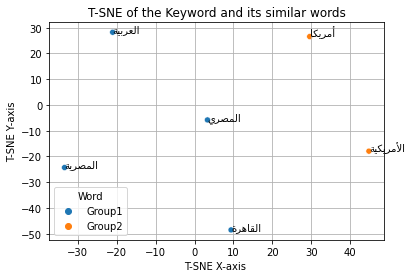

In [194]:
#Anallogy2
Anallogy2=wv.most_similar(positive=["مصر","الأمريكية"], negative=["أمريكا"], topn=10)
drawTSNE_pair(wv,500, ["العربية","المصري","القاهرة","المصرية"],["الأمريكية","أمريكا"])
#Anallogy2

6


[('دمشق', 0.5070635676383972),
 ('السورية', 0.4606870710849762),
 ('سورية', 0.4527646005153656),
 ('واشنطن', 0.4451574683189392),
 ('لبنان', 0.43993714451789856),
 ('السوري', 0.437679648399353),
 ('درعا', 0.4253350794315338),
 ('السوريين', 0.42169952392578125),
 ('الأردن', 0.41713207960128784),
 ('اللاذقية', 0.4132705330848694)]

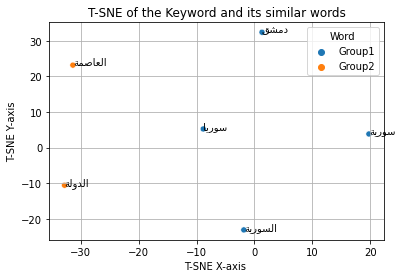

In [195]:
#Anallogy3
Anallogy3=wv.most_similar(positive=["سوريا","العاصمة"], negative=["الدولة"], topn=10)
drawTSNE_pair(wv,500,["سورية","السورية","دمشق","سوريا"],["العاصمة","الدولة"] )
Anallogy3

6


[('طويلة', 0.42124491930007935),
 ('القصيرة', 0.4189845621585846),
 ('الطويلة', 0.41742950677871704),
 ('قصص', 0.4157355725765228),
 ('لفترة', 0.37345218658447266),
 ('شميده', 0.34093227982521057),
 ('لهيركيول', 0.33781418204307556),
 ('القصير', 0.33776697516441345),
 ('بفترة', 0.3360592722892761),
 ('إينسوورث', 0.334708571434021)]

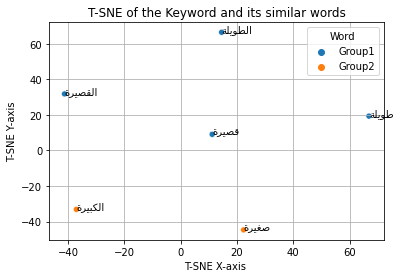

In [198]:
#Anallogy4
Anallogy4=wv.most_similar(positive=["قصيرة", "الكبيرة"], negative=["صغيرة"], topn=10)
drawTSNE_pair(wv,500,["الطويلة","القصيرة","طويلة","قصيرة"],["صغيرة","الكبيرة"])
Anallogy4

6


[('الشمالية', 0.5238220691680908),
 ('شمال', 0.508781373500824),
 ('غرب', 0.5037574768066406),
 ('أبلاشيا', 0.5017226934432983),
 ('جنوب', 0.5014530420303345),
 ('الأمريكيتين', 0.4967503547668457),
 ('الكاتينغا', 0.4961806535720825),
 ('الجنوبية', 0.4949930012226105),
 ('راكونيات', 0.4919070303440094),
 ('فاكسينيوم', 0.4875338077545166)]

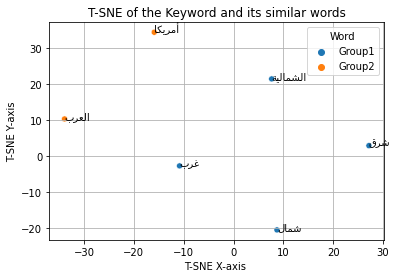

In [193]:
#Anallogy5
Anallogy5=wv.most_similar(positive=["أمريكا", "شرق"], negative=["العرب"], topn=10) 
drawTSNE_pair(wv,500, ["غرب","شمال","الشمالية","شرق"],["أمريكا","العرب"])
Anallogy5